# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
#Importing basic necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

#Importing classifier libraries (NOTE: I will not be running XGBoost since it is optional).
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier

#Import model-tuning function.
from sklearn.model_selection import GridSearchCV

#Import metric calculator libraries.
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

#Import warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the data.

from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['EasyVisa.csv']))

Saving EasyVisa.csv to EasyVisa.csv


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Making a copy of the original DataFrame in case changes need to be made to the data set.

df = data.copy()

In [ ]:
#Checking the shape of the data set.

print("There are", df.shape[0], "rows and", df.shape[1], "columns in this data set.")

There are 25480 rows and 12 columns in this data set.


In [ ]:
#Checking the first 5 rows of the data set.

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#Checking the last 5 rows of the data set.

df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
#Checking the basic information of the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The only columns with numerical values are no_of_employees, yr_of_estab, and prevailing_wage.

In [ ]:
#Getting a statistical summary of the columns.

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column counting the number of employees has negative values (which is not possible). This can be fixed by taking the absolute value of the negative numbers.

In [ ]:
#Replacing the negative numbers with their absolute value.
df["no_of_employees"] = abs(df["no_of_employees"])

#Checking to make sure the data is updated.
df["no_of_employees"].min()

11

The original minimun was -26, now it is 11. We can analyze the variables now!

In [ ]:
#Checking for missing values.

df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There appear to be no missing values.

In [ ]:
#Checking for duplicate values.

df.duplicated().sum()

0

There appear to be no duplicate values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

###Defining Visualization Functions


In [ ]:
#Defining a function to create a boxplot and histogram together.

def histoBoxplot(data, feature, figsize = (15, 10), kde = True, bins = None):
    """
    Boxplot and Histogram combined:

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    #Creating the 2 subplots.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,                       #Number of rows of the subplot grid
        sharex = True,                   #X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )

    #Creating the boxplot that also indicates the mean.
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "lightpink")

    #Creating the histogram.
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, color = "lightpink"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, color = "lightpink"
    )

    #Adding mean to the histogram.
    ax_hist2.axvline(data[feature].mean(), color = "deeppink", linestyle = "--")

    #Adding median to the histogram.
    ax_hist2.axvline(data[feature].median(), color = "purple", linestyle = "-")

In [ ]:
#Defining a fucntion to create labeled countplots.

def labeledCountplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top:

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])                #Length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize = (count + 2, 8))
    else:
        plt.figure(figsize = (n + 2, 8))

    plt.xticks(rotation = 90)
    ax = sns.countplot(
        data = df,
        x = feature,
        palette = "hls",
        order = data[feature].value_counts().index[:n],
    )
    plt.ylabel("Count")

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total  #Percentage of each class of the category
            )
        else:
            label = p.get_height()            #Count of each level of the category

        x = p.get_x() + p.get_width() / 2     #Width of the plot
        y = p.get_height()                    #Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0,5),
            textcoords = "offset points",
        )                                     #Annotate the percentage

    plt.show()

In [ ]:
#Defining a function to create stacked countplots.

def stackedCountplot(data, predictor, target, palette = "Set2"):
    """
    Print the category counts on the stacked countplot:

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    sns.set_palette(palette)
    tab.plot(kind = "bar", stacked = True, figsize = (count + 5, 5))
    plt.legend(
        loc = "lower left", frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
    plt.show()

###Univariate Analysis

1. case_id

In [ ]:
#Seeing how many unique case IDs are in the data set.

print("There are", df["case_id"].nunique(), "unique cases in this data set.")

There are 25480 unique cases in this data set.


This column offers nothing useful for analysis, given that is merely for data point identification purposes. Thus, it will not be analyzed futher.

2. continent

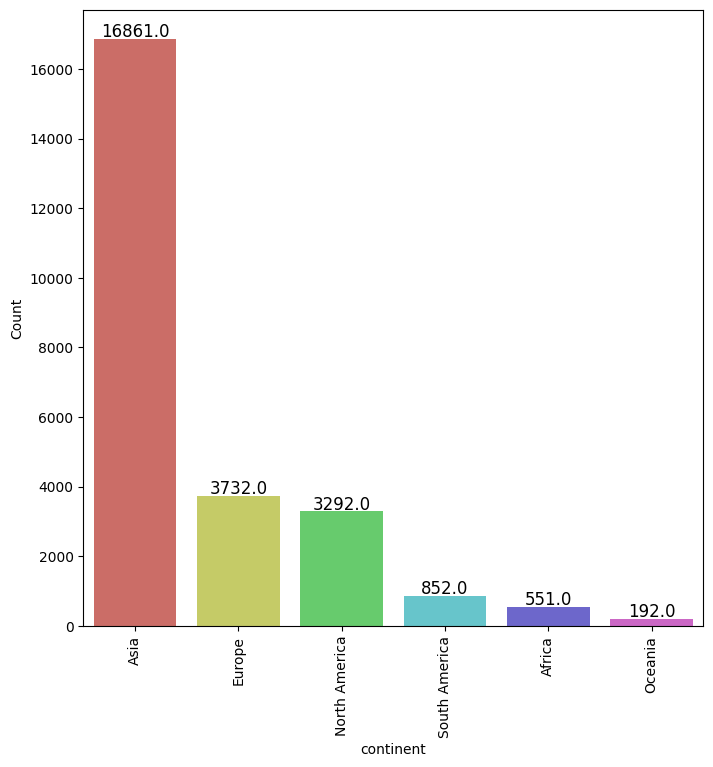

In [ ]:
#Creating a labeled countplot for the continents listed on the applications.

labeledCountplot(df, "continent")

The large majority of applicants listed their current continent as Asia. The least number of applicants listed their current continent as Oceania.

3. education_of_employee

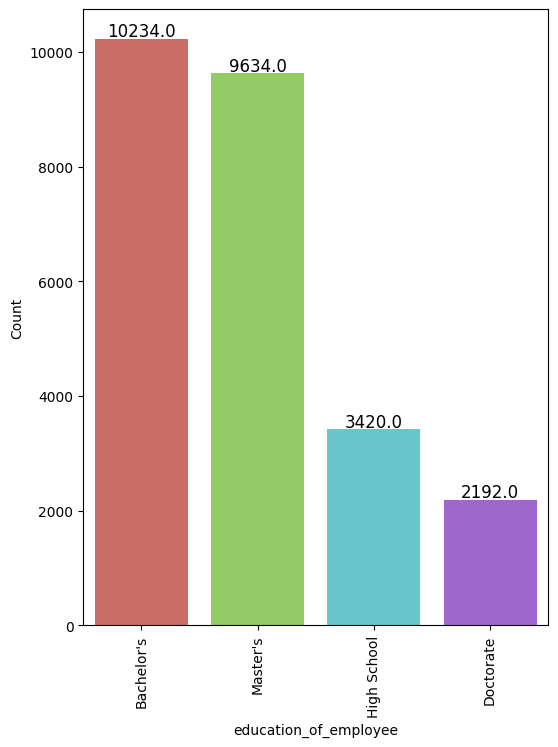

In [ ]:
#Creating a labeled countplot for education of the applicants.

labeledCountplot(df, "education_of_employee")

Most applicants have either a Bachelor's or a Bachelor's *and* a Master's degree. Applicants with doctorates make up the smallest part of the application pool.

4. has_job_experience

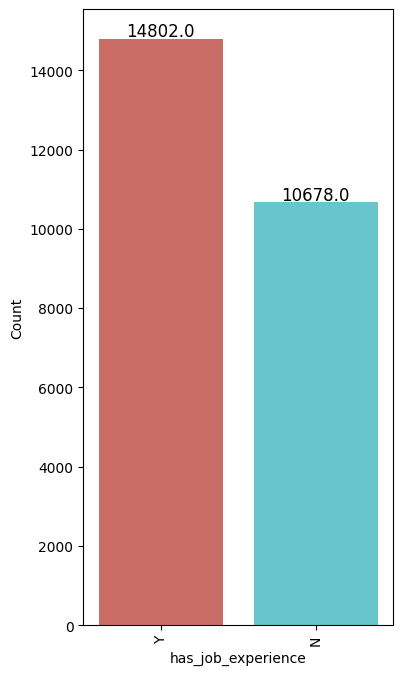

In [ ]:
#Creating a labeled countplot for applicant job experience.

labeledCountplot(df, "has_job_experience")

Most applicants *do* have previous job experience.

5. requires_job_training

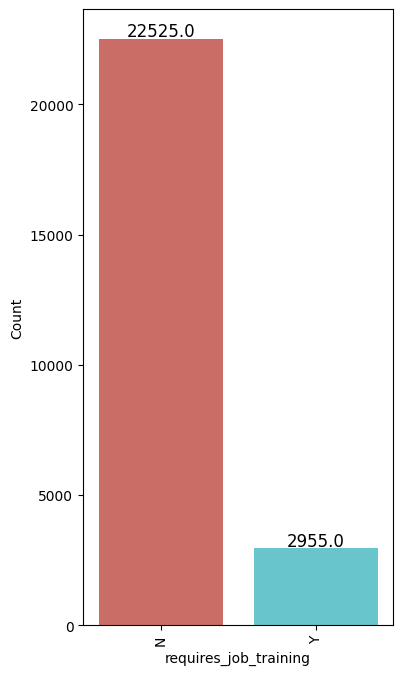

In [ ]:
#Creating a labeled countplot for employee training.

labeledCountplot(df, "requires_job_training")

The overwhelming majority of applicants *do not* require training for their jobs.

6. no_of_employees

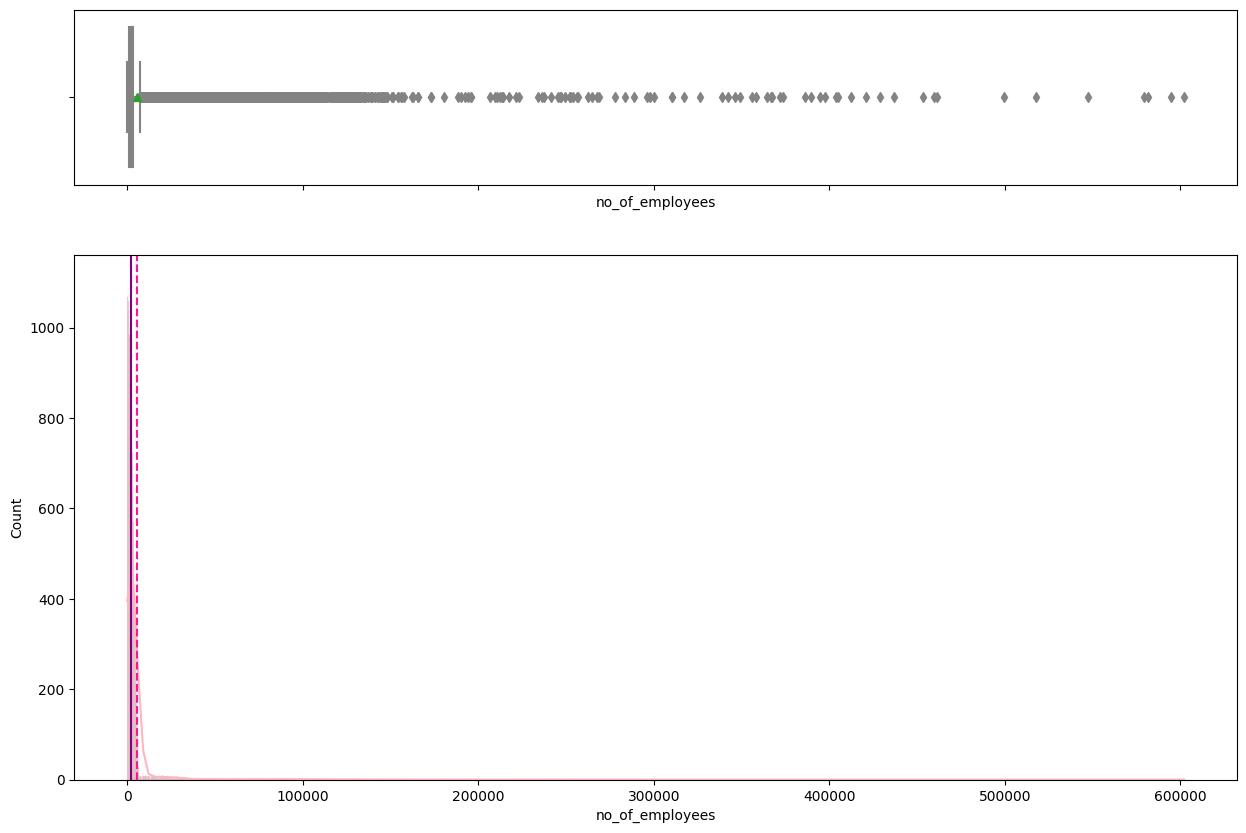

In [ ]:
#Creating a histogram and boxplot to see the mean/median number of employees.

histoBoxplot(df, "no_of_employees")

The data is difficult to read since there are an extreme number of outliers skewing the data to the right. It appears that the mean and median number of employee's at the applicant's companies hover around 1000, but independent checking returns that the mean number of employees is 5667, and the median is 2109. This indicates that the company sizes vary wildly.

7. yr_of_estab

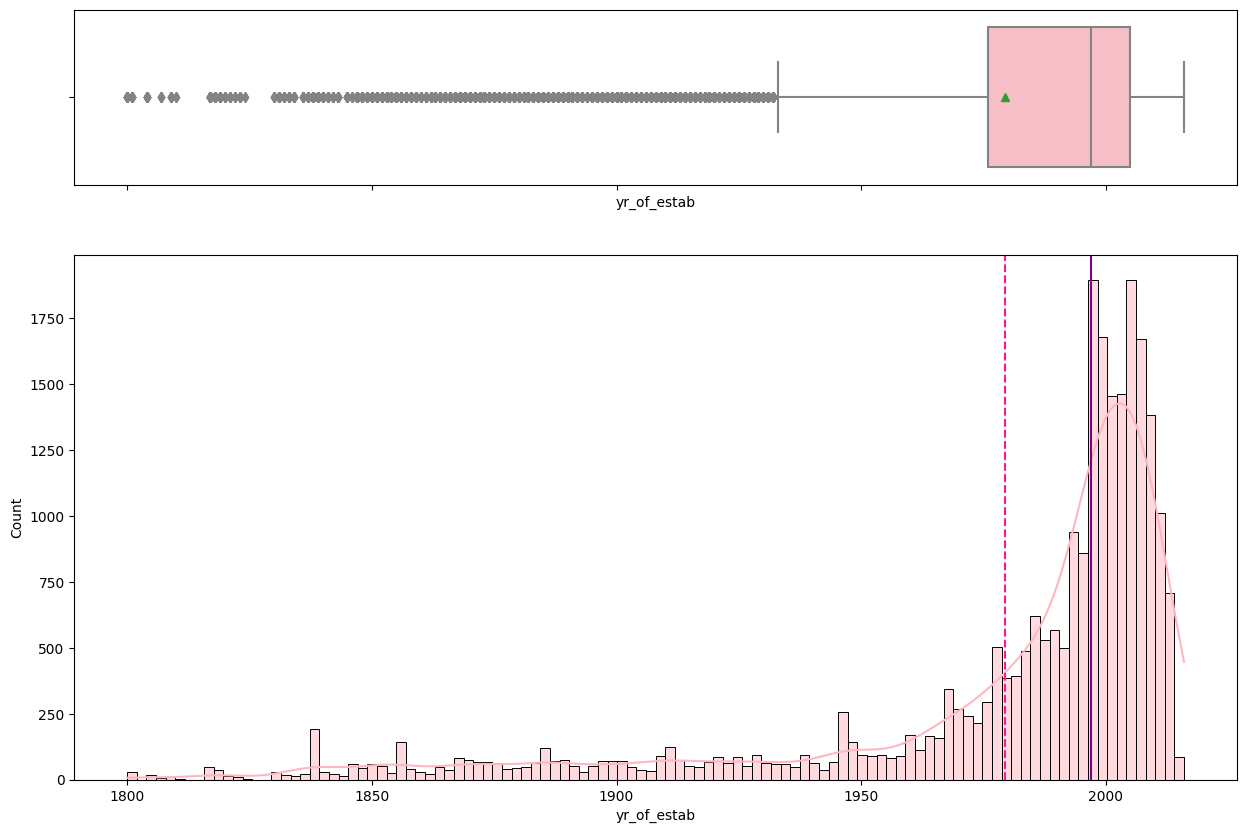

In [ ]:
#Creating a histogram and boxplot to see the mean/median year of company establishment.

histoBoxplot(df, "yr_of_estab")

The median year of establishment for the companies is 1997, and the mean is 1979. Although most companies were started in the late 90s and onward, many applicants work for companies started way before. Many companies were established as early as the 1800s, skewing the data to the left.

8. region_of_employment

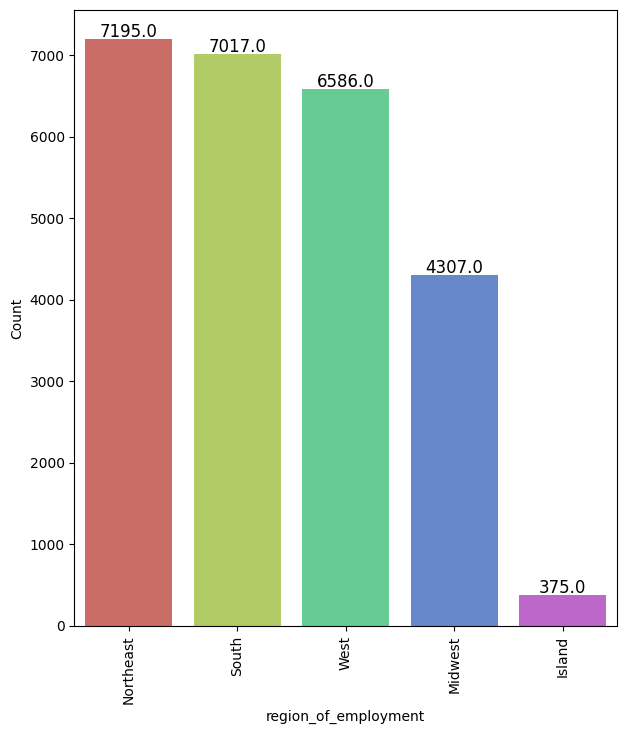

In [ ]:
#Creating a labeled countplot for the region of employment listed on the applications.

labeledCountplot(df, "region_of_employment")

There appears to be a closely even distribution of applicants from the Northeast, South, and West regions of the US. The Midwest has significantly less, but the Island region has the smallest by far (not even a thousand applicants).

9. prevailing_wage

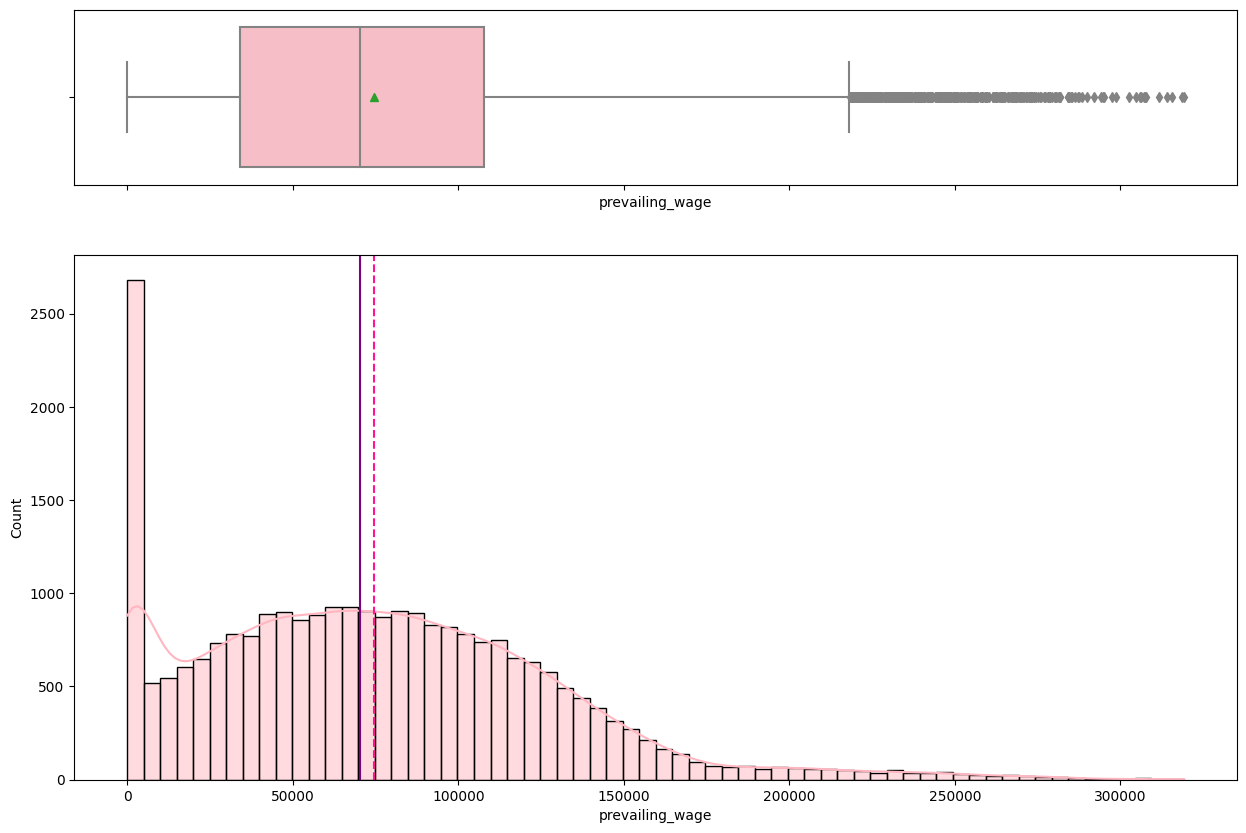

In [ ]:
#Creating a histogram and boxplot to see the distribution of prevailing wages.

histoBoxplot(df, "prevailing_wage")

Given that prevailing wages are not counted the same (some hourly, some annually, etc.), these graphs might not tell us too much useful information. It might be better to separate based on unit and then perform futher analysis.

Annual salaries and hourly pay are the most common ways of listing wages. We can make individual graphs for those.

In [ ]:
#Creating a DataFrame of only yearly listed wages.

yearlyUnit = df.groupby("unit_of_wage").get_group("Year")[["prevailing_wage"]]

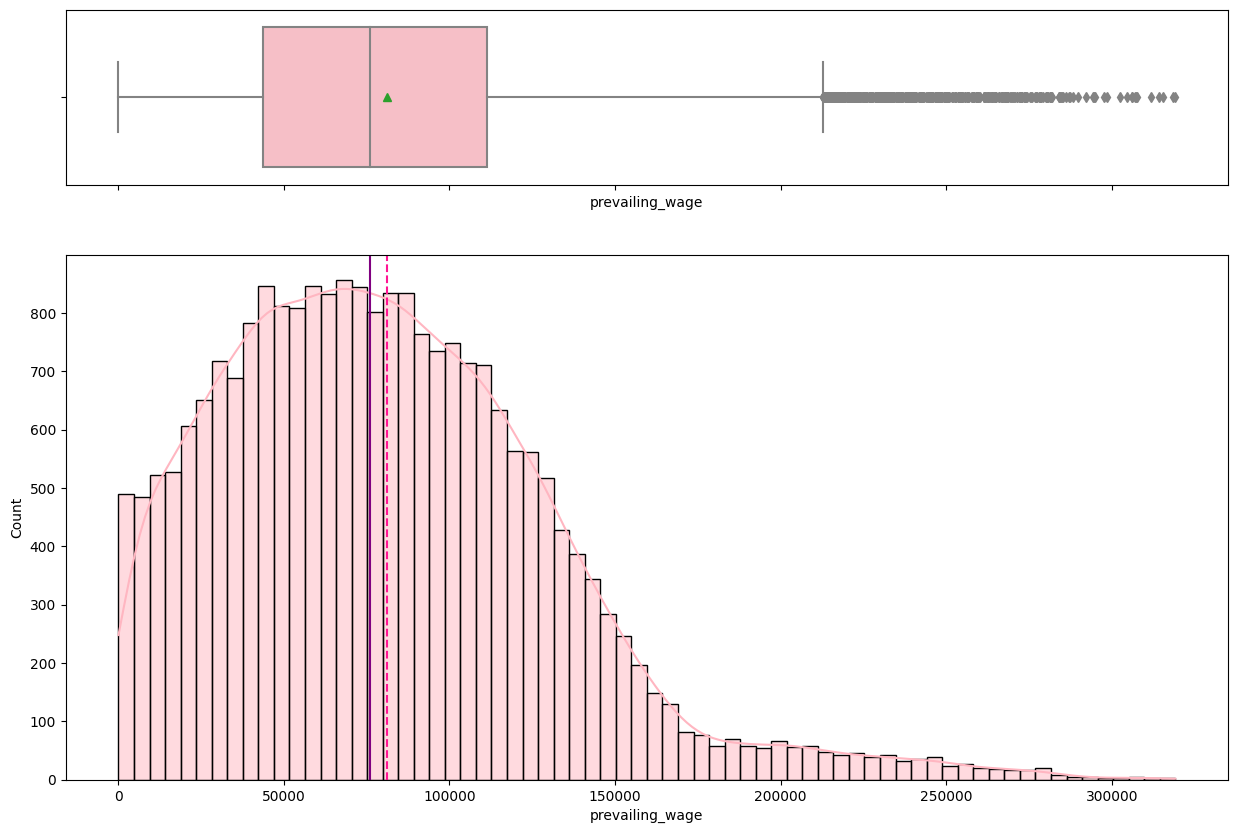

In [ ]:
#Creating a histogram and boxplot to see the distribution of YEARLY prevailing wages.

histoBoxplot(yearlyUnit, "prevailing_wage")

We can see now that the mean and median annual salaries are around ~$80,000. There are still many applicants with extremely high wages that skew the data to the right. The lowest seems to be around 0, which could be mislabeled or a misunderstaning on the applicant's part (for example, they could have written 100k instead of 100,000).

In [ ]:
#Creating a DataFrame of only hourly listed wages.

hourlyUnit = df.groupby("unit_of_wage").get_group("Hour")[["prevailing_wage"]]

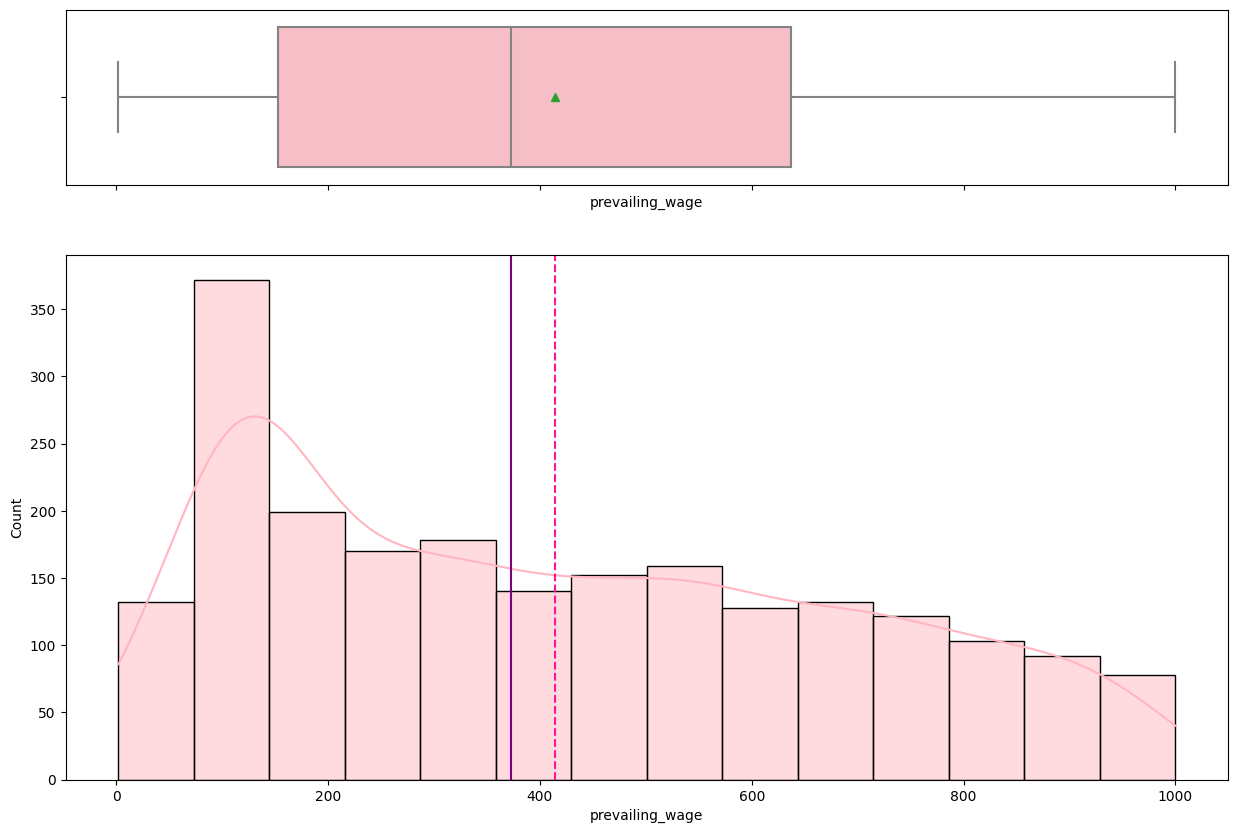

In [ ]:
#Creating a histogram and boxplot to see the distribution of HOURLY prevailing wages.

histoBoxplot(hourlyUnit, "prevailing_wage")

The mean hourly rate is a bit over $400/hr, while the median rate is a bit under the same. Generally, these hourly wages seem to be pretty high.

In [ ]:
hourlyUnit.mean()

prevailing_wage    414.570513
dtype: float64

10. unit_of_wage

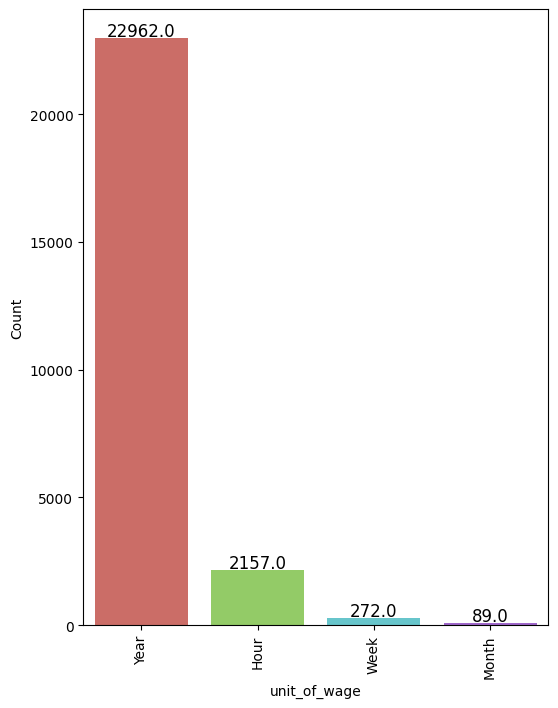

In [ ]:
#Creating a labeled countplot for the unit of the prevailing wage.

labeledCountplot(df, "unit_of_wage")

The large majority of jobs are listed by their annual salary. A few thousands are listed by their hourly pay, and hardly any by weekly or monthly pay (very uncommon in the US).

11. full_time_position

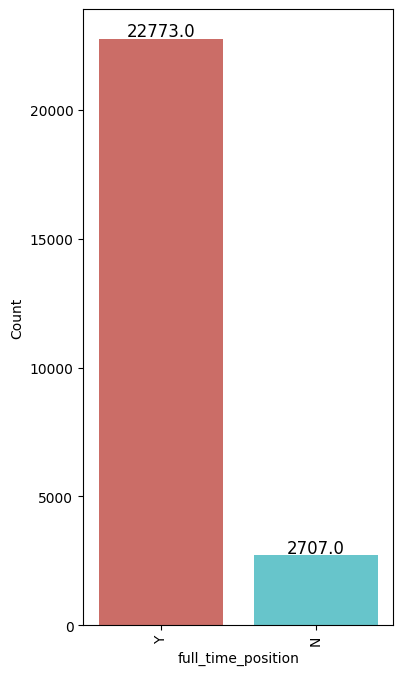

In [ ]:
#Creating a labeled countplot for employment position types.

labeledCountplot(df, "full_time_position")

The very large majority of applicant jobs are full time-positions.

12. case_status

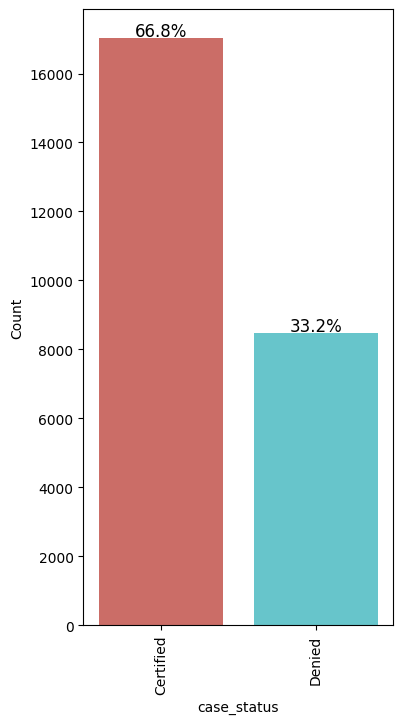

In [ ]:
#Creating a labeled countplot for case status.

labeledCountplot(df, "case_status", perc = True)

2/3 of cases have been certified (approved), and 1/3 have been denied.

###Bivariate Analysis

1. education_of_employee vs. case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


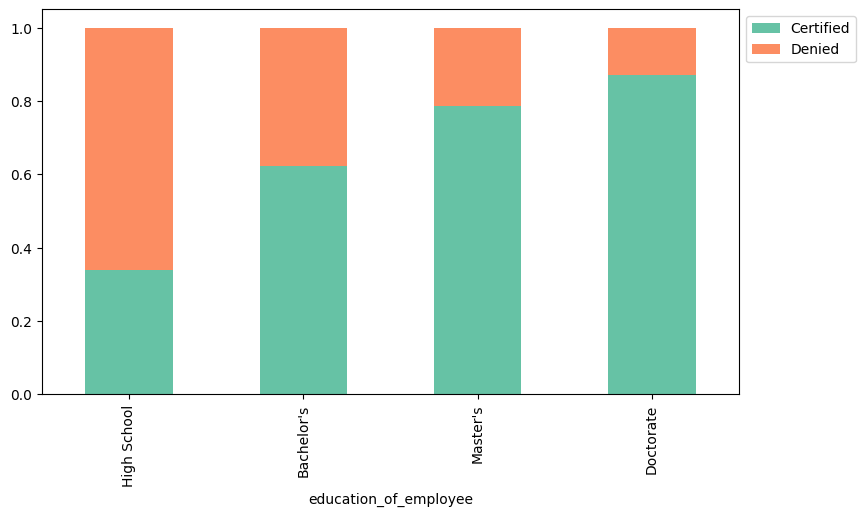

In [ ]:
#Creating a stacked countplot of applicant education vs. case status.

stackedCountplot(df, "education_of_employee", "case_status")

There seems to be a positive correlation between higher education and likelihood of the applicant's visa getting certified; applicants with only a high school diploma only got certified about 35% of the time, increasing all the way to about 85% for those with doctorates.

2. region_of_employment vs. case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


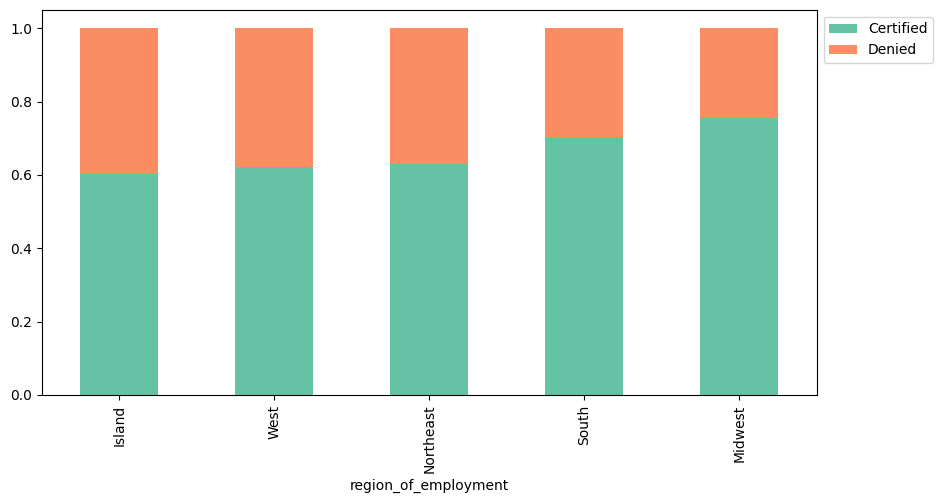

In [ ]:
#Creating a stacked countplot of region of employment vs. case status.

stackedCountplot(df, "region_of_employment", "case_status")

All regions have between 60% to 80% of visa certifications, with the Midwest having the highest.

3. continent vs. case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


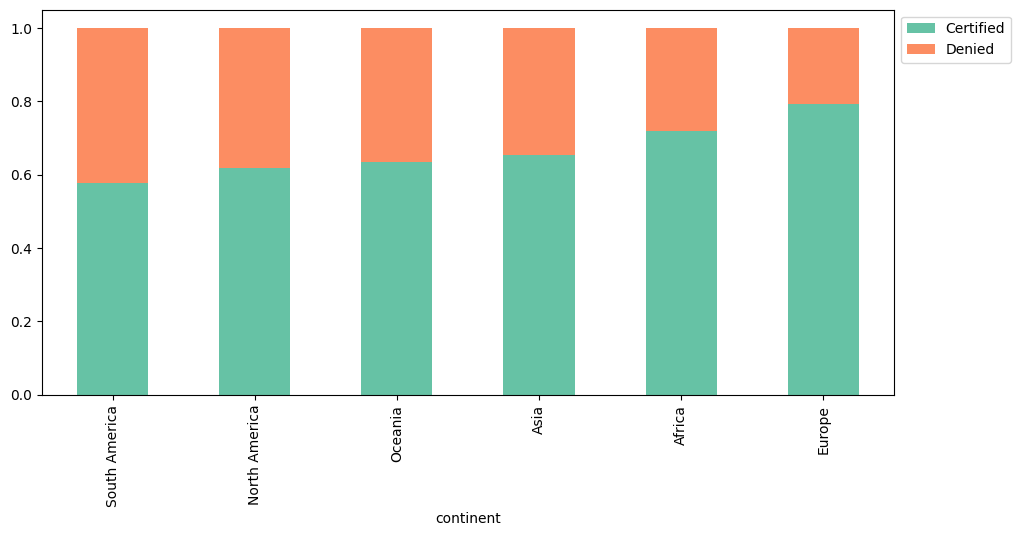

In [ ]:
#Creating a stacked countplot of continent vs. case status.

stackedCountplot(df, "continent", "case_status")

Though most applicants come from Asia, European applicants have the highest percentage of visa certifications, followed by Africa, and then Asia.

4. has_job_experience vs. case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


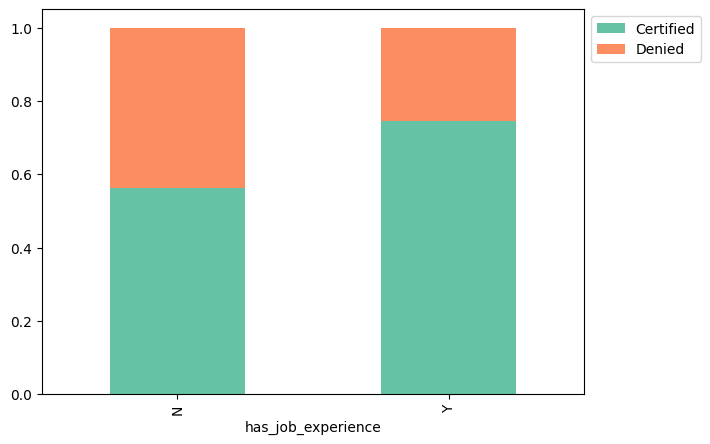

In [ ]:
#Creating a stacked countplot of applicant job experience vs. case status.

stackedCountplot(df, "has_job_experience", "case_status")

As expected, applicants with previous job experience have a higher percentage of visa certifications (about 75%) than those who do not (about 55%).

5. unit_of_wage vs. case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


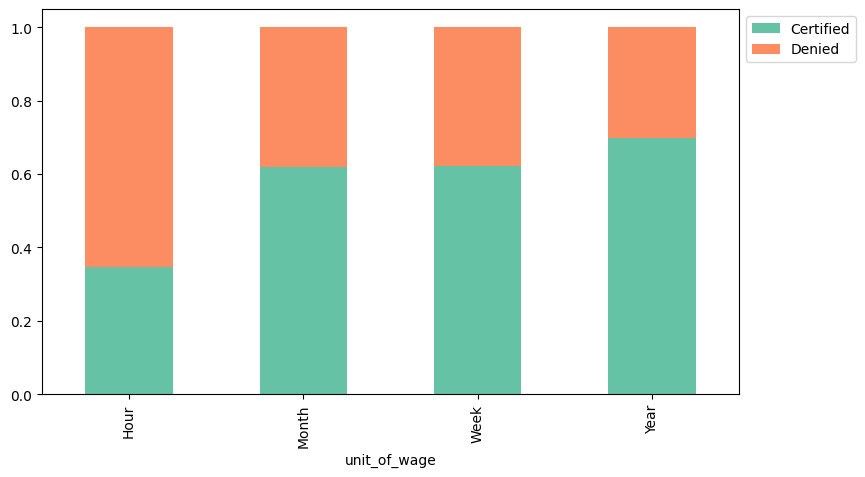

In [ ]:
#Creating a stacked countplot of wage unit vs. case status.

stackedCountplot(df, "unit_of_wage", "case_status")

Salaried applicants (yearly unit) have the highest percentage of certifications, while hourly applicants have the lowest. Monthly and weekly employees have about the same.

6. full_time_position vs. case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


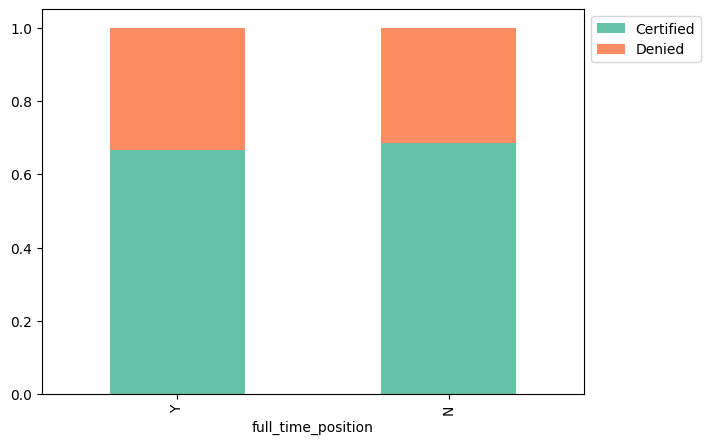

In [ ]:
#Creating a stacked countplot of position type vs. case status.

stackedCountplot(df, "full_time_position", "case_status")

There is very little difference between percentage of visa certifications for full-time applicants vs. part-time/other, but it seems that not having a full-time position has a slighly better chance of getting certified.

7. has_job_experience vs. requires_job_training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


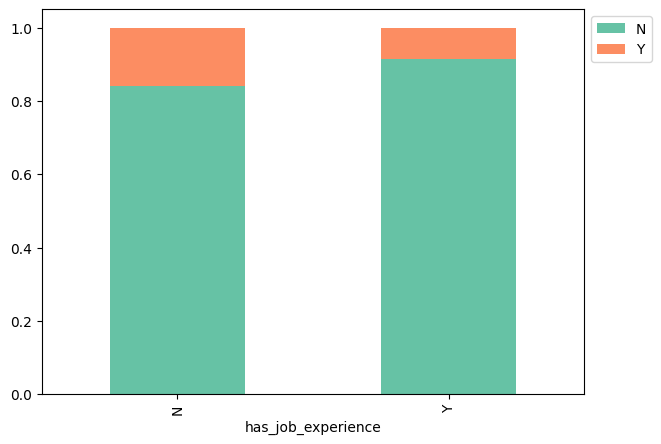

In [ ]:
#Creating a stacked countplot of applicant job experience vs. case status.

stackedCountplot(df, "has_job_experience", "requires_job_training")

As expected, less applicants with previous job experience require job training compared to those without previous experience.

8. prevailing_wage vs. education_of_employee

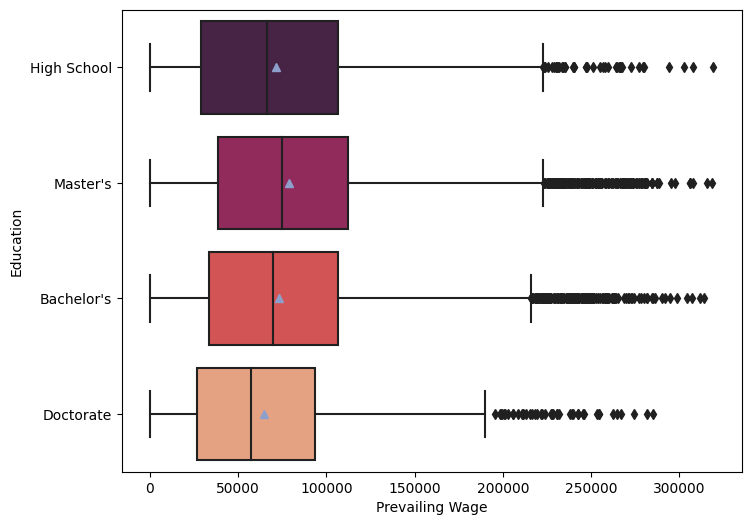

In [ ]:
#Creating a boxplot of prevailing wage for each education category.

plt.figure(figsize = (8,6))
sns.boxplot(df, x = "prevailing_wage", y = "education_of_employee", showmeans = True, palette = "rocket")
plt.xlabel("Prevailing Wage")
plt.ylabel("Education")
plt.show()

Oddly, applicants with doctorates do not have the highest mean/median wages; those with a Master's do, followed by Bachelor's, and high school diplomas. Applicants holding doctorates actually have the lowest!

9. prevailing_wage vs. case_status

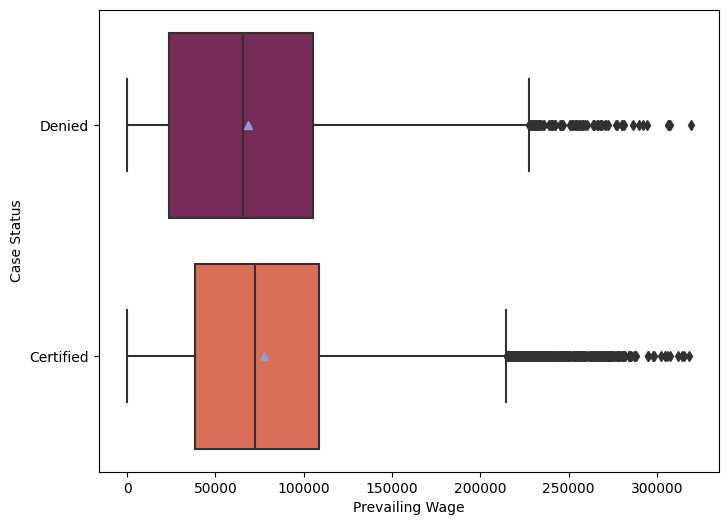

In [ ]:
#Creating a boxplot of prevailing wage for each case status.

plt.figure(figsize = (8,6))
sns.boxplot(df, x = "prevailing_wage", y = "case_status", showmeans = True, palette = "rocket")
plt.xlabel("Prevailing Wage")
plt.ylabel("Case Status")
plt.show()

Applicants with denied visas had lower mean/median wages, compared to those who were certified.

10. prevailing_wage vs. region_of_employment

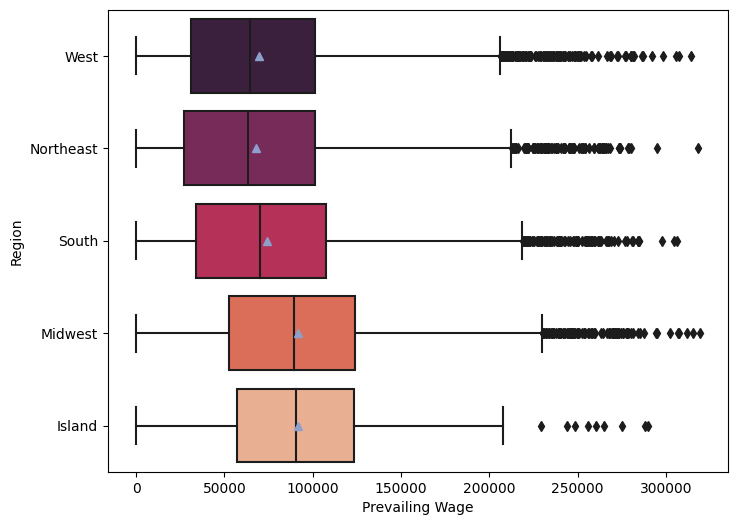

In [ ]:
#Creating a boxplot of prevailing wage for each region of employment.

plt.figure(figsize = (8,6))
sns.boxplot(df, x = "prevailing_wage", y = "region_of_employment", showmeans = True, palette = "rocket")
plt.xlabel("Prevailing Wage")
plt.ylabel("Region")
plt.show()

The Midwest and Island regions have the highest wages, with the Island having a slightly higher median and the Midwest having a slightly higher mean. The 3 remaining regions fall significantly behind, with the Northeast having the lowest mean/median wages.

11. education_of_employee vs. region_of_employment

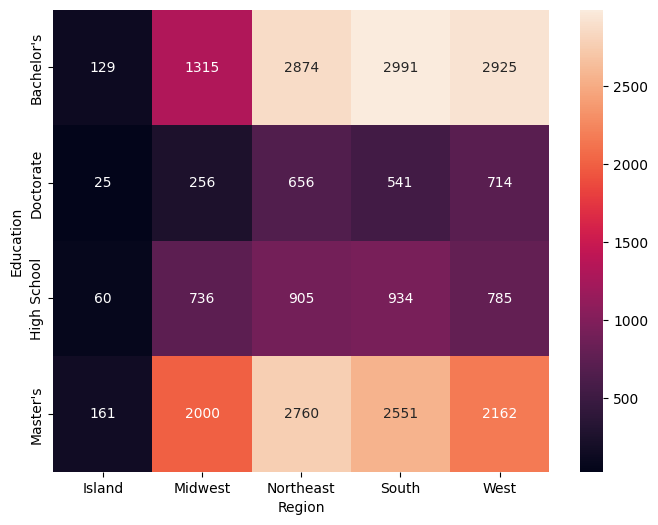

In [ ]:
#Creating a table counting applicants for each education and region combination.

plt.figure(figsize = (8, 6))
sns.heatmap(pd.crosstab(df["education_of_employee"], df["region_of_employment"]),
    annot = True,
    fmt = "g",
    cmap = "rocket"
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* The Island region does not seem to be too selective when it comes to education of their employees.
* The Midwest appears to prefer higher levels of education, since they have more employees with Master's than any other category.
* The Northeast is pretty equal with employees holding Master's and Bachelor's.
* The South has mostly employees with Bachelor's degrees, but plenty with Master's as well.
* The West seems to select employees with Bachelor's degrees the most.

Though employees with doctorates are the smallest group in all regions, having a doctorate is not very common. Though it appears like employees who only have a high school diploma are the least hired.

12. heatmap

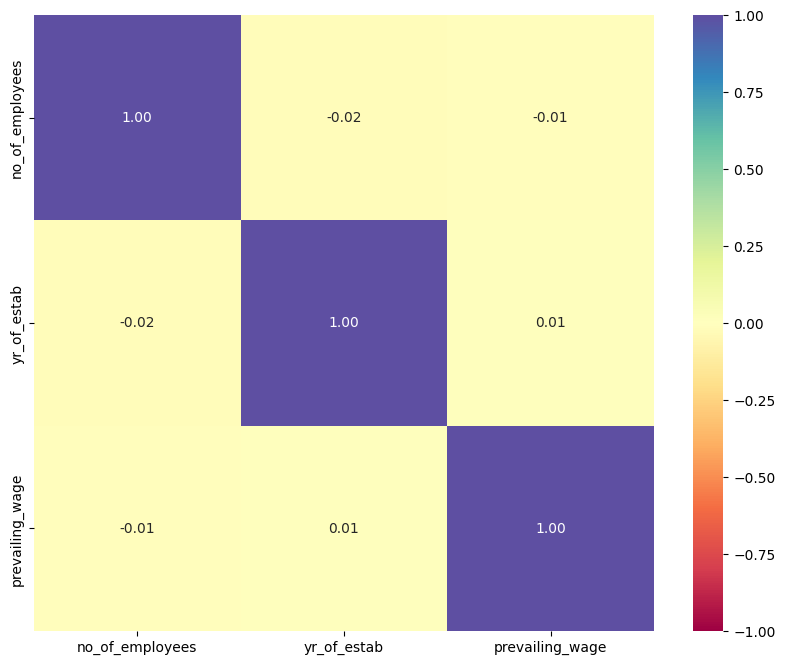

In [ ]:
#Creating a heatmap of all the numerical variables.

numCols = ["no_of_employees", "yr_of_estab", "prevailing_wage"]

plt.figure(figsize = (10,8))
sns.heatmap(df[numCols].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

None of the numerical variables have a strong or notable correlation with each other.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment


In [ ]:
#Checking for missing values.

df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the data, so nothing nees to be done.

### Feature Engineering

In [ ]:
#Dropping the case_id column, since it it not useful for analysis.

df = df.drop("case_id", axis = 1)

In [ ]:
#Checking to make sure the column is gone.

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#Encoding the dependent variable into 0 and 1 for classification.

df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

### Outlier Detection

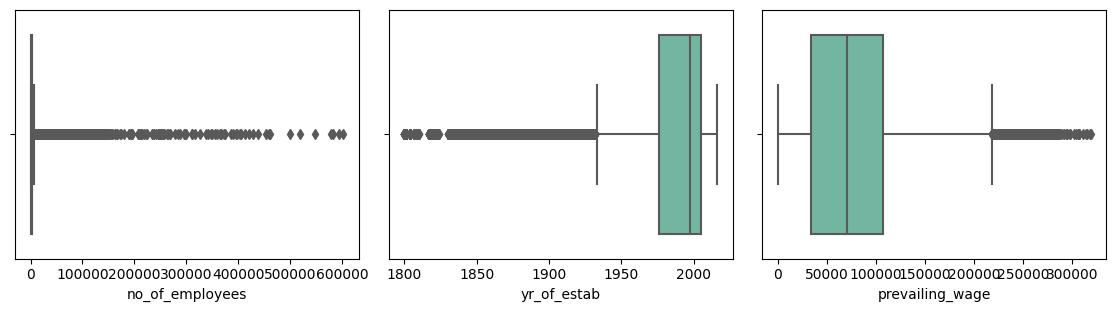

In [ ]:
#Plotting only the outliers from the numeric columns. There is already an existing numCols variable.

plt.figure(figsize = (15, 12))

for i, variable in enumerate(numCols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df, x = variable)
    plt.tight_layout()

plt.show()

Though all three numerical columns have outliers, none will be treated:

* Companies vary from huge international Fortune 500s to small start-ups, so it make sense that some will have a very small number of employees, while others have huge numbers.
* Some companies may be old (est. 1800s) while others may have recently been established.
* Though it is clear that prevailing wage counts all type of wage distinctions (annual, hourly, etc.), we cannot normalize the column since we do not know if all applicants worked the same amount of hours. Regardless, we can run analysis on the column and use the added column of wage unit to interpret the results.

### Preparing Data for Modeling

In [ ]:
#Creating the dependent and independent variables.

X = df.drop(["case_status"], axis = 1)
y = df["case_status"]

print(X.head())
print()
print(y.head())

  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position  
0         Hour                  Y  
1         Year      

In [ ]:
#Creating dummy variables for the categorical/object columns.

X = pd.get_dummies(X, columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [ ]:
#Splitting the data set into 70:30 train/test sets, with stratification.

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
print("Number of rows in train data =", xTrain.shape[0])
print("Number of rows in test data =", xTest.shape[0])

Number of rows in train data = 17836
Number of rows in test data = 7644


## Model Performace Evaluators & Notes

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [ ]:
#Defining a function to compute different metrics to check performance of the classification model.

def modelPerform(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #Checking which probabilities are greater than the threshold.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)          #Computing accuracy
    recall = recall_score(target, pred)         #Computing recall
    precision = precision_score(target, pred)   #Computing precision
    f1 = f1_score(target, pred)                 #Computing F1-score

    #Creating a dataframe to display the scores.
    dfPerform = pd.DataFrame(
        {
          "Accuracy": acc,
          "Recall": recall,
          "Precision": precision,
          "F1": f1
        },
        index=[0],
    )

    return dfPerform

In [ ]:
def confusionMatrix(model, predictors, target):
    """
    Function to plot the confusion matrix with percentages:

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    yPred = model.predict(predictors)
    cm = confusion_matrix(target, yPred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = labels, fmt = "")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

## Decision Tree

### Default Model

In [ ]:
#Creating the decision tree default model.
decisionTree = DecisionTreeClassifier(random_state = 1)

#Fitting it onto the training data.
decisionTree.fit(xTrain, yTrain)

DecisionTreeClassifier(random_state=1)

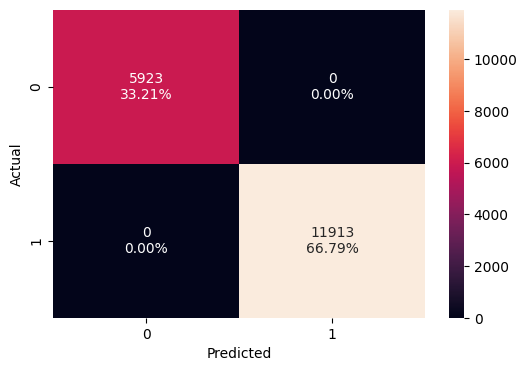

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(decisionTree, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

dtStatsTrain = modelPerform(decisionTree, xTrain, yTrain)
dtStatsTrain

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


As expected, the default decision tree model has a 100% score across all metrics. The model split until every single data point was classified correctly, and is now extremely overfit.

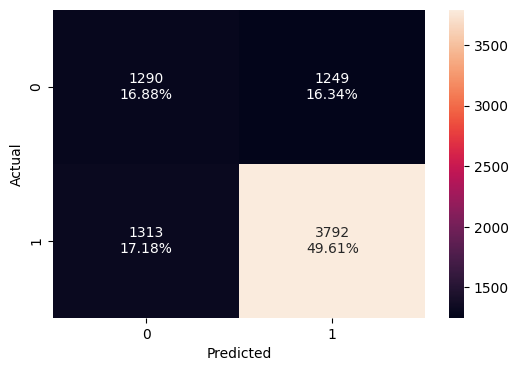

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(decisionTree, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

dtStatsTest = modelPerform(decisionTree, xTest, yTest)
dtStatsTest

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


Looking at the testing data, the model significantly underperforms in terms of accuracy, and performs mediocrely in the other three metrics (commits Type I and Type II errors about the same amount of times). The model is only suited for the training data, so we need to optimize it with hyperparameters.

### Tuned Model (Hyperparameters)

In [ ]:
#Building the model with added class_weight parameter.
decisionTreeTuned = DecisionTreeClassifier(class_weight = "balanced", random_state = 1)

#Defining the given hyperparameter grid.
parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

#Defining scoring used to compare parameter combinations.
scorer = metrics.make_scorer(metrics.f1_score)

#Running GridSearch.
gridObj = GridSearchCV(decisionTreeTuned, parameters, scoring = scorer, n_jobs = -1)
gridObj = gridObj.fit(xTrain, yTrain)

#Setting the clf to the optimized hyperparameters.
decisionTreeTuned = gridObj.best_estimator_

#Fitting the tuned model onto the training data.
decisionTreeTuned.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

The optimal hyperparameters are:
* max_depth = 5
* max_leaf_nodes = 10
* min_impurity_decrease = 0.0001

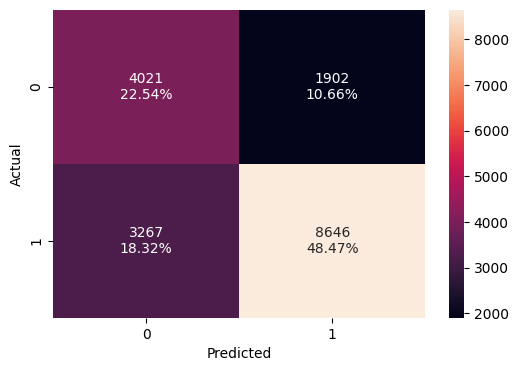

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(decisionTreeTuned, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

dtStatsTunedTrain = modelPerform(decisionTreeTuned, xTrain, yTrain)
dtStatsTunedTrain

,Accuracy,Recall,Precision,F1
0,0.710193,0.725762,0.819681,0.769868


The tuned model's accuracy is still the lowest-scoring metric, but has still improved from the default's performance on the testing data. Recall is a bit lower, but the other two metrics have increased as well. However, this is still a weak model.

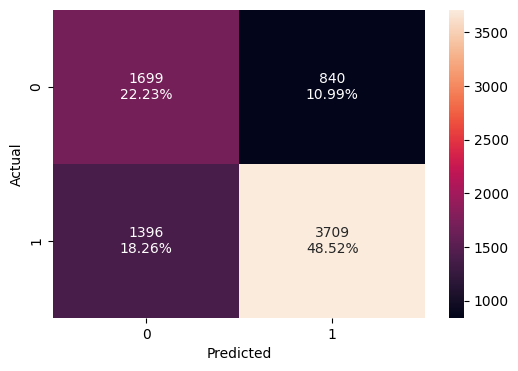

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(decisionTreeTuned, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

dtStatsTunedTest = modelPerform(decisionTreeTuned, xTest, yTest)
dtStatsTunedTest

,Accuracy,Recall,Precision,F1
0,0.707483,0.726543,0.815344,0.768386


The testing data has very similar scores to the training data, meaning that the model is not overfit anymore (but still needs improvement).

## Random Forest

### Default Model

In [ ]:
#Creating the random forest default model.
randomForest = RandomForestClassifier(random_state = 1)

#Fitting it onto the training data.
randomForest.fit(xTrain, yTrain)

RandomForestClassifier(random_state=1)

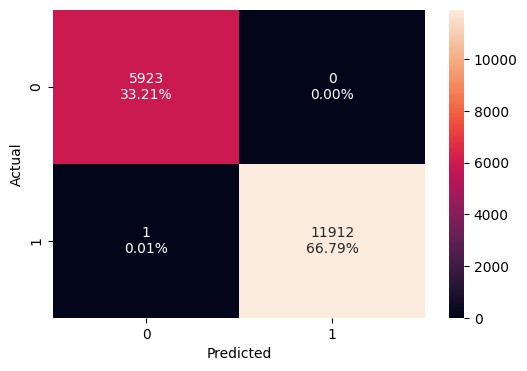

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(randomForest, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

rfStatsTrain = modelPerform(randomForest, xTrain, yTrain)
rfStatsTrain

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


Except for a singular data point incorrectly classified, the default Random Forest model is extremely overfit to the training data, and essentially has a 100% score across all metrics.

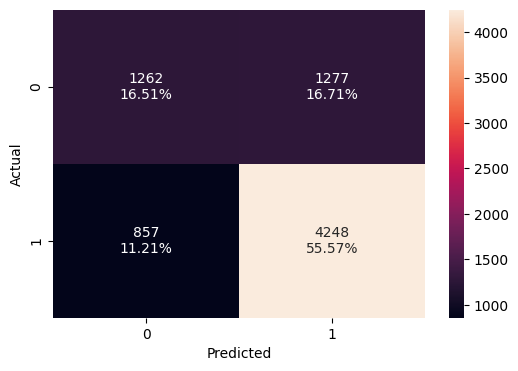

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(randomForest, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

rfStatsTest = modelPerform(randomForest, xTest, yTest)
rfStatsTest

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


Though the model performs decently well across all metrics (except for accuracy, which is mediocre at best), the model commits as many Type I errors as it correctly identifies 0s. The model could still use tuning.

### Tuned Model (Hyperparameters)

In [ ]:
#Building the model with added OOB score and boostrapping parameters.
randomForestTuned = RandomForestClassifier(random_state = 1, oob_score = True, bootstrap = True)

#Defining the given hyperparameter grid.
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Defining scoring used to compare parameter combinations.
scorer = metrics.make_scorer(metrics.f1_score)

#Running GridSearch.
gridObj = GridSearchCV(randomForestTuned, parameters, scoring = scorer, cv = 5, n_jobs = -1)
gridObj = gridObj.fit(xTrain, yTrain)

#Setting the clf to the optimized hyperparameters.
randomForestTuned = gridObj.best_estimator_

#Fitting the tuned model onto the training data.
randomForestTuned.fit(xTrain, yTrain)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       oob_score=True, random_state=1)

The optimal hyperparameters are:
* max_samples = 0.4
* min_samples_leaf = 3
* n_estimators = 110

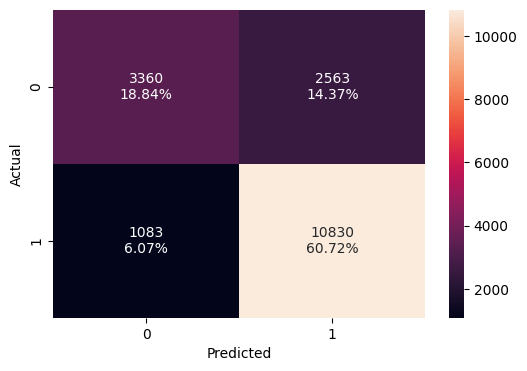

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(randomForestTuned, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

rfStatsTunedTrain = modelPerform(randomForestTuned, xTrain, yTrain)
rfStatsTunedTrain

,Accuracy,Recall,Precision,F1
0,0.795582,0.909091,0.808631,0.855923


The model has very good recall, precision, and F1. Accuracy is also good, but the model commits a lot of Type I errors still.

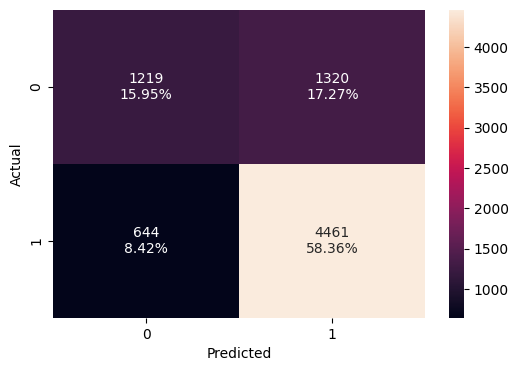

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(randomForestTuned, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

rfStatsTunedTest = modelPerform(randomForestTuned, xTest, yTest)
rfStatsTunedTest

,Accuracy,Recall,Precision,F1
0,0.743066,0.873849,0.771666,0.819585


The testing data performs similarly, but generally not as well as the training data. Perhaps the model is slightly overfit, but not enough to be completely unusable.

## Bagging

### Default Model

In [ ]:
#Creating the default bagging classifier model.
bagging = BaggingClassifier(random_state = 1)

#Fitting the model onto the training data.
bagging.fit(xTrain, yTrain)

BaggingClassifier(random_state=1)

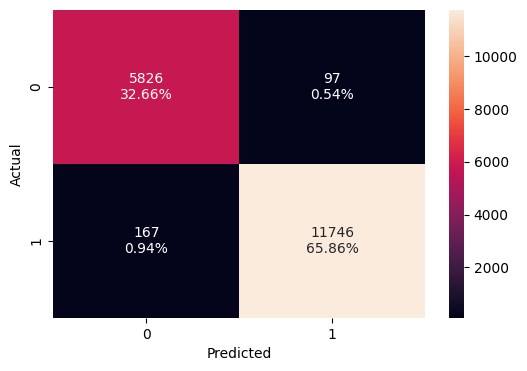

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(bagging, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

bagStatsTrain = modelPerform(bagging, xTrain, yTrain)
bagStatsTrain

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


Since all four metrics are very close to 100%, the model is overfit on the training data.

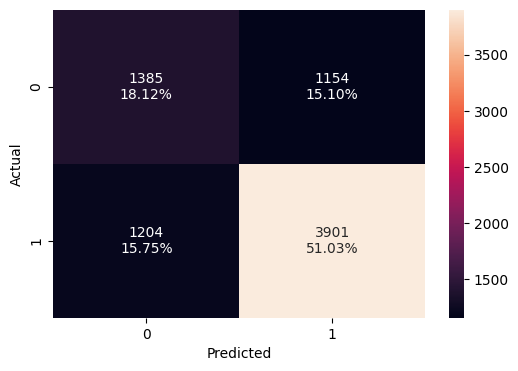

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(bagging, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

bagStatsTest = modelPerform(bagging, xTest, yTest)
bagStatsTest

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


The model performs more poorly on the testing data; accuracy is the lowest of the metrics (equal amount of Type I and Type II errors), while the other three metrics hover around a decent 76%.

### Tuned Model (Hyperparameters)

In [ ]:
#Building the model.
baggingTuned = BaggingClassifier(random_state = 1)

#Defining the given hyperparameter grid.
parameters = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Defining scoring used to compare parameter combinations.
scorer = metrics.make_scorer(metrics.f1_score)

#Running GridSearch.
gridObj = GridSearchCV(baggingTuned, parameters, scoring = scorer, cv = 5)
gridObj = gridObj.fit(xTrain, yTrain)

#Setting the clf to the optimized hyperparameters.
baggingTuned = gridObj.best_estimator_

#Fitting the tuned model onto the training data.
baggingTuned.fit(xTrain, yTrain)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

The optimal hyperparameters are:
* max_samples = 0.8
* max_features = 0.7
* n_estimators = 70

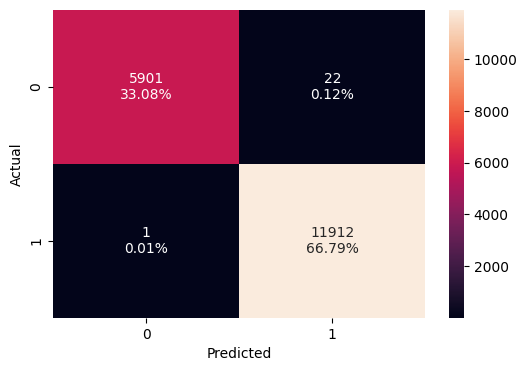

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(baggingTuned, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

bagStatsTunedTrain = modelPerform(baggingTuned, xTrain, yTrain)
bagStatsTunedTrain

,Accuracy,Recall,Precision,F1
0,0.99871,0.999916,0.998157,0.999036


Even with the hyperparameters, the model appear to be way overfit just from the training data; all metrics are close to 100%.

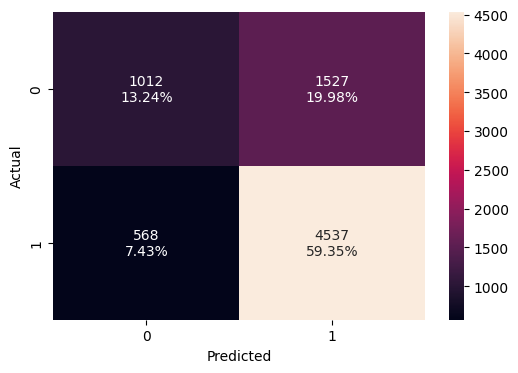

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(baggingTuned, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

bagStatsTunedTest = modelPerform(baggingTuned, xTest, yTest)
bagStatsTunedTest

,Accuracy,Recall,Precision,F1
0,0.725929,0.888737,0.748186,0.812427


As stated, the model is still very overfit on the data. All metric scores decrease significantly with the testing data, particularly accuracy and precision (many Type I errors). Recall stays high, however.

## AdaBoost

### Default Model

In [ ]:
#Creating the default AdaBoost model.
adaBoost = AdaBoostClassifier(random_state = 1)

#Fitting the model onto the training data.
adaBoost.fit(xTrain, yTrain)

AdaBoostClassifier(random_state=1)

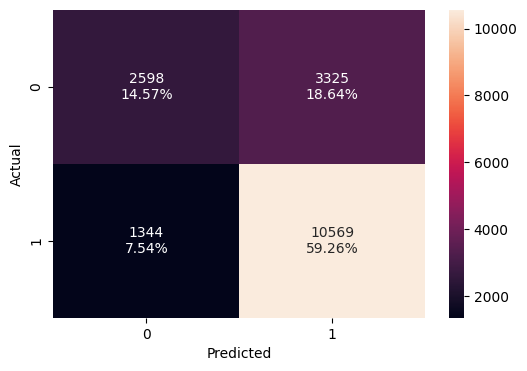

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(adaBoost, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

abStatsTrain = modelPerform(adaBoost, xTrain, yTrain)
abStatsTrain

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


The default model is actually performing decently well without being extremely overfit; though accuracy and precision are low-ish, they are not as low as other models when they run on the testing data. It's a decent model without  tuning!

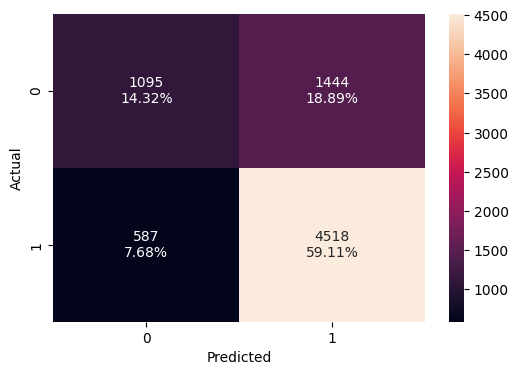

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(adaBoost, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

abStatsTest = modelPerform(adaBoost, xTest, yTest)
abStatsTest

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


The testing data performs *very* similarly to the training data, which means the model is not overfit to the training data!

### Tuned Model (Hyperparameters)

In [ ]:
#Building the model.
adaBoostTuned = AdaBoostClassifier(random_state = 1)

#Defining the given hyperparameter grid.
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth = 2, random_state = 1),
        DecisionTreeClassifier(max_depth = 3, random_state = 1),
    ],
}

#Defining scoring used to compare parameter combinations.
scorer = metrics.make_scorer(metrics.f1_score)

#Running GridSearch.
gridObj = GridSearchCV(adaBoostTuned, parameters, scoring = scorer, cv = 5)
gridObj = gridObj.fit(xTrain, yTrain)

#Setting the clf to the optimized hyperparameters.
adaBoostTuned = gridObj.best_estimator_

#Fitting the tuned model onto the training data.
adaBoostTuned.fit(xTrain, yTrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

The optimal hyperparameters are:
* base_estimator = DTC w/ max_depth = 3
* learning_rate = 0.1

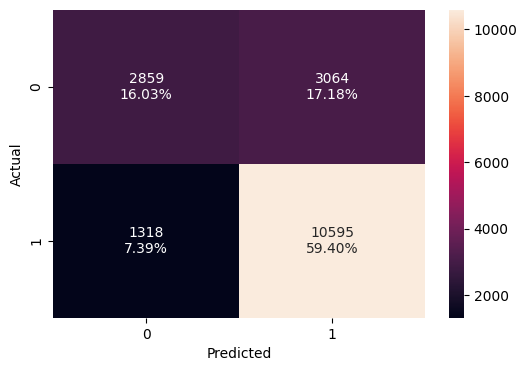

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(adaBoostTuned, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

abStatsTunedTrain = modelPerform(adaBoostTuned, xTrain, yTrain)
abStatsTunedTrain

,Accuracy,Recall,Precision,F1
0,0.754317,0.889365,0.775679,0.828641


This model performs greatly (and very similarly to the default model)! The lowest metric is accuracy, at a decent 75%! Precision is similar but still decently high, and F1 and recall are quite high without seeming like the model is overfit.

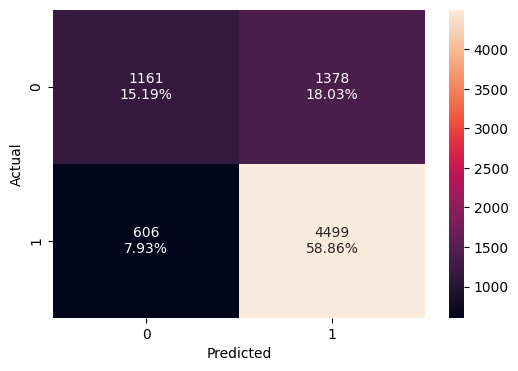

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(adaBoostTuned, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

abStatsTunedTest = modelPerform(adaBoostTuned, xTest, yTest)
abStatsTunedTest

,Accuracy,Recall,Precision,F1
0,0.74045,0.881293,0.765527,0.819341


The testing data performs similarly to the training data! This is a decently strong model that is not overfit, which is good. Though, tuning might not have been super necessary.

## Gradient Boost

### Default Model

In [ ]:
#Creating the default Gradient Boosting model.
gb = GradientBoostingClassifier(random_state = 1)

#Fitting the model onto the training data.
gb.fit(xTrain, yTrain)

GradientBoostingClassifier(random_state=1)

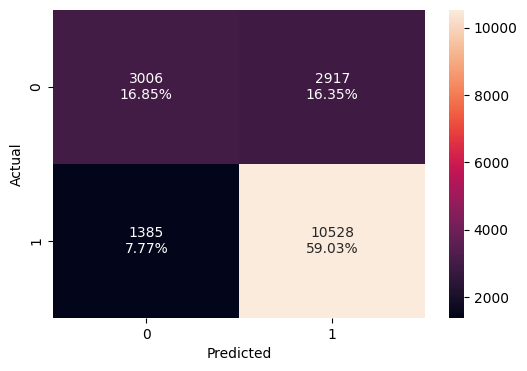

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(gb, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

gbStatsTrain = modelPerform(gb, xTrain, yTrain)
gbStatsTrain

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


The default gradient boosting model is great! The data does not appear to be overfit since it commits a decent number of errors, but still maintains decently high scores across all four metrics. Though it commits a lot of Type I errors, accuracy isn't too low.

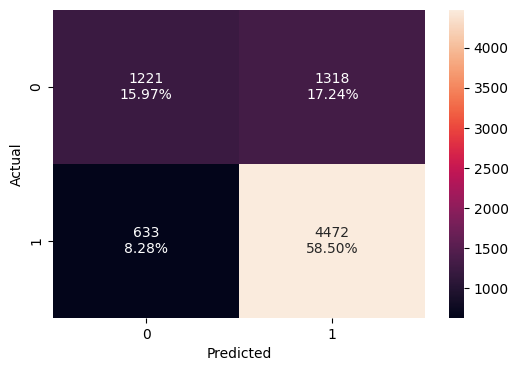

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(gb, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

gbStatsTest = modelPerform(gb, xTest, yTest)
gbStatsTest

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


The model performs very similarly on the testing data, so it does not appear to be too biased. So far, a decently strong model without tuning.

### Tuned Model (Hyperparameters)

In [ ]:
#Building the model using AdaBoost as the base model.
gbTuned = GradientBoostingClassifier(init = AdaBoostClassifier(random_state = 1), random_state = 1)

#Defining the given hyperparameter grid.
parameters = {
    "init": [AdaBoostClassifier(random_state = 1), DecisionTreeClassifier(random_state = 1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Defining scoring used to compare parameter combinations.
scorer = metrics.make_scorer(metrics.f1_score)

#Running GridSearch.
gridObj = GridSearchCV(gbTuned, parameters, scoring = scorer, cv = 5)
gridObj = gridObj.fit(xTrain, yTrain)

#Setting the clf to the optimized hyperparameters.
gbTuned = gridObj.best_estimator_

#Fitting the tuned model onto the training data.
gbTuned.fit(xTrain, yTrain)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

The optimal hyperparameters are:
* init = ABC w/random_state = 1
* learning_rate = 0.05
* max_features = 0.7
* subsample = 0.9

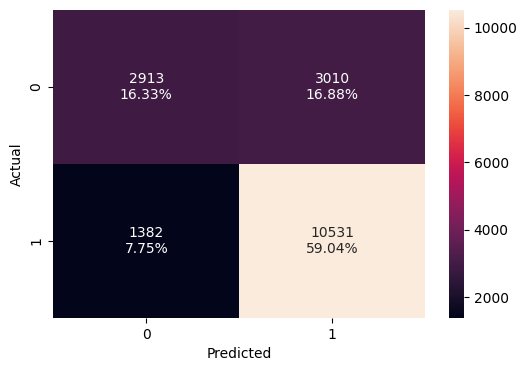

In [ ]:
#Creating a confusion matrix for the training data.

confusionMatrix(gbTuned, xTrain, yTrain)

In [ ]:
#Checking model performance metrics on the training data.

gbStatsTunedTrain = modelPerform(gbTuned, xTrain, yTrain)
gbStatsTunedTrain

,Accuracy,Recall,Precision,F1
0,0.753756,0.883992,0.777712,0.827453


The tuned model perfoms very well, about the same as the default model!

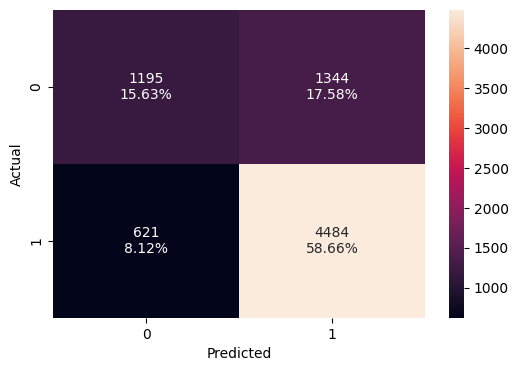

In [ ]:
#Creating a confusion matrix for the testing data.

confusionMatrix(gbTuned, xTest, yTest)

In [ ]:
#Checking model performance metrics on the testing data.

gbStatsTunedTest = modelPerform(gbTuned, xTest, yTest)
gbStatsTunedTest

,Accuracy,Recall,Precision,F1
0,0.742936,0.878355,0.769389,0.820269


Again, the model performs about the same with the testing data as it does with the training data. Both this model and the default model are successful, so tuning was maybe not super necessary. But the models are not overfit in this case.

## Model Performance Comparison and Conclusions

In [ ]:
#Creating a table showing all the model performance scores across the training data.

allModelsTrain = pd.concat(
    [
        dtStatsTrain.T,
        dtStatsTunedTrain.T,
        rfStatsTrain.T,
        rfStatsTunedTrain.T,
        bagStatsTrain.T,
        bagStatsTunedTrain.T,
        abStatsTrain.T,
        abStatsTunedTrain.T,
        gbStatsTrain.T,
        gbStatsTunedTrain.T
    ],
    axis = 1,
)

allModelsTrain.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "AdaBoost Classifier",
    "Tuned AdaBoost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier"
]

print("Training Performance Comparison:")
allModelsTrain

Training Performance Comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Bagging Classifier,Tuned Bagging Classifier,AdaBoost Classifier,Tuned AdaBoost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.710193,0.999944,0.795582,0.985198,0.998710,0.738226,0.754317,0.758802,0.753756
Recall,1.0,0.725762,0.999916,0.909091,0.985982,0.999916,0.887182,0.889365,0.883740,0.883992
Precision,1.0,0.819681,1.000000,0.808631,0.991810,0.998157,0.760688,0.775679,0.783042,0.777712
F1,1.0,0.769868,0.999958,0.855923,0.988887,0.999036,0.819080,0.828641,0.830349,0.827453


In [ ]:
#Creating a table showing all the model performance scores across the testing data.

allModelsTest = pd.concat(
    [
        dtStatsTest.T,
        dtStatsTunedTest.T,
        rfStatsTest.T,
        rfStatsTunedTest.T,
        bagStatsTest.T,
        bagStatsTunedTest.T,
        abStatsTest.T,
        abStatsTunedTest.T,
        gbStatsTest.T,
        gbStatsTunedTest.T,
    ],
    axis = 1,
)

allModelsTest.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "AdaBoost Classifier",
    "Tuned AdaBoost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]

print("Testing Performance Comparison:")
allModelsTest

Testing Performance Comparison:


,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest,Bagging Classifier,Tuned Bagging Classifier,AdaBoost Classifier,Tuned AdaBoost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.664835,0.707483,0.720827,0.743066,0.691523,0.725929,0.734301,0.740450,0.744767,0.742936
Recall,0.742801,0.726543,0.832125,0.873849,0.764153,0.888737,0.885015,0.881293,0.876004,0.878355
Precision,0.752232,0.815344,0.768869,0.771666,0.771711,0.748186,0.757799,0.765527,0.772366,0.769389
F1,0.747487,0.768386,0.799247,0.819585,0.767913,0.812427,0.816481,0.819341,0.820927,0.820269


Looking more at the testing data (since most of the models are overfit to the training data, and usually perform worse or similarly with the testing data), the strongest and most consistent models are:
* Random Forest (tuned)
* AdaBoost (default & tuned)
* Gradient Boost (default & tuned)

All these models had very similar scores across the four metrics and performed either better or very very similarly on the testing data compared to the training data, meaning they were not excessively overfit. I would choose these, as they appear to be the most reliable.

## Actionable Insights and Recommendations

Based on the model performace metrics, EasyVisa should recommend that the OFLC uses either:
* Random Forest (tuned)
* AdaBoost
* Gradient Boost

Though all models are not perfect, they seem to commit more Type I errors (falsely certifying a visa that should be denied) than Type II, which is arguably easier to deal with (better to falsely accept a bad candidate than falsely reject a good one, which is what they are looking for).

Based on variable analyses, an ideal candidate profile looks like:
* education of a Bachelor's degree or higher
* selected region of employment in the Midwest, South, or Northeast
* hails from Europe, Africa, or Asia
* has previous job experience
* wage calculated as an annual (yearly) salary

as these all correlate with higher likelihood of visa certification.

Based on these insights, the OFLC should consider shortlisting applicants who meet all the above criteria, and disregard (or consider last) applicants with only high school diplomas, no previous job experience, or seeking/working at a position with an hourly rate or pay. Certain factors like region of employment or native continent are not necessarily a detriment, but the data suggest these factors make it less likely a visa will be certified (for example, it appears the West is not hiring a lot, compared to other regions).
